## Shared Bikes - Assignment

#### Problem Statement:

A US bike-sharing provider `BoomBikes` has provided a dataset on daily bike demands across the American market based on various environmental and seasonal settings. Using this data we need to understand the factors affecting the demand for these shared bikes in the American market and develop a mindful business plan to accelerate its revenue as soon as the ongoing lockdown due to the pandemic ends.

The company wants to know —


- Which variables are significant in predicting the demand for shared bikes?


- How well those variables describe the bike demands

## 1. Reading and Understanding the Data
 firs, import the libraries and understand the various attributes of the data, its size etc...

In [281]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [282]:
# Reading the dataset
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [283]:
# Shape of the dataframe
df.shape

(730, 16)

In [284]:
# Summary of the dataset: 730 rows, 16 columns, no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [285]:
# some insights of the features
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Data Preparation

As per the data dictionary some the columns are assinged with numeric values, which needs to be manipulated as it might not indicate the same order

In [286]:
# Assigning string values to different seasons instead of numeric values. 

# 1=spring
df.loc[df['season']==1, 'season'] = 'spring'

# 2=summer
df.loc[(df['season'] == 2) , 'season'] = 'summer'

# 3=fall
df.loc[(df['season'] == 3) , 'season'] = 'fall'

# 4=winter
df.loc[(df['season'] == 4) , 'season'] = 'winter'

In [287]:
# validate whether the conversion is done properly or not for season
df['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [288]:
# year (0: 2018, 1:2019)
df['yr'].value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [289]:
# Assign string values to different months instead of numeric values as it may misindicate some order to it.
# define a function to map actual numeric values to appropriate string values
def month_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

# Applying the function 
df[['mnth']] = df[['mnth']].apply(month_map)

In [290]:
# validate whether the conversion is done properly or not for month column
df['mnth'].value_counts()

mnth
Jan     62
Mar     62
May     62
Jul     62
Aug     62
Oct     62
Dec     62
Apr     60
Jun     60
Sept    60
Nov     60
Feb     56
Name: count, dtype: int64

In [291]:
# whether day is a holiday or not (0: No, 1: Yes)
df['holiday'].value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [292]:
# Assign string values to different weekday instead of numeric values as it may misindicate some order to it.
# define a function to map actual numeric values to appropriate string values
def week_map(x):
    return x.map({1: 'Mon', 2: 'Tues', 3: 'Wed', 4: 'Thurs', 5: 'Fri', 6: 'Sat', 0: 'Sun'})

# Applying the function
df[['weekday']] = df[['weekday']].apply(week_map)

In [293]:
# validate whether the conversion is done properly or not for weekday column
df['weekday'].value_counts()

weekday
Sat      105
Sun      105
Mon      105
Tues     104
Thurs    104
Fri      104
Wed      103
Name: count, dtype: int64

In [294]:
# if a day is neither weekend nor a holiday it takes the value 1, otherwise 0
df['workingday'].value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

In [295]:
# Assigning weathersit column with string values for better readability and understanding

# 1-Clear, Few clouds, Partly cloudy, Partly cloudy
df.loc[(df['weathersit'] == 1) , 'weathersit'] = 'Few'

# 2-Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
df.loc[(df['weathersit'] == 2) , 'weathersit'] = 'Mist'

# 3-Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
df.loc[(df['weathersit'] == 3) , 'weathersit'] = 'Rain'

# 4-Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
df.loc[(df['weathersit'] == 4) , 'weathersit'] = 'Heavy'

In [296]:
# validate whether the conversion is done properly or not for weathersit column
df['weathersit'].value_counts()

weathersit
Few     463
Mist    246
Rain     21
Name: count, dtype: int64

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


## Data Visualization (EDA)
- Understanding the distribution of numeric variables
- Check Multicolinearility
  

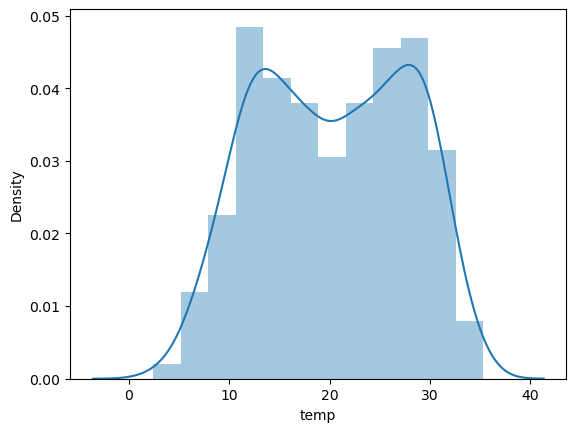

In [298]:
# Univariate Analysis for the columns temp, atemp, hum, windspeed
# Target variable: (cnt) count of total rental bikes including both casual and registered
# temperature
sns.distplot(df['temp'])
plt.show()

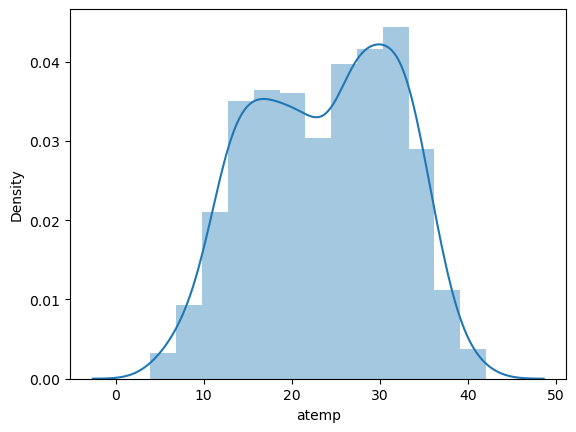

In [299]:
# feeling temperature
sns.distplot(df['atemp'])
plt.show()

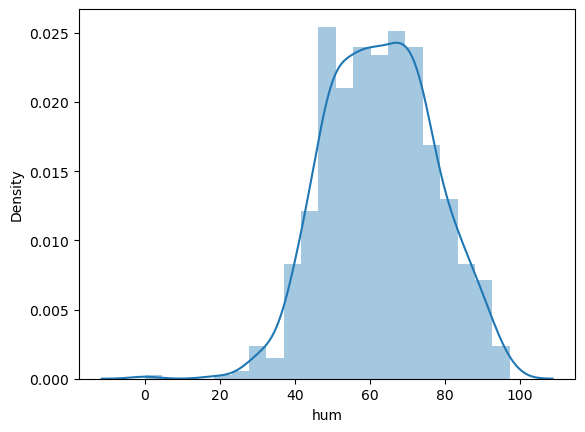

In [300]:
# humidity
sns.distplot(df['hum'])
plt.show()

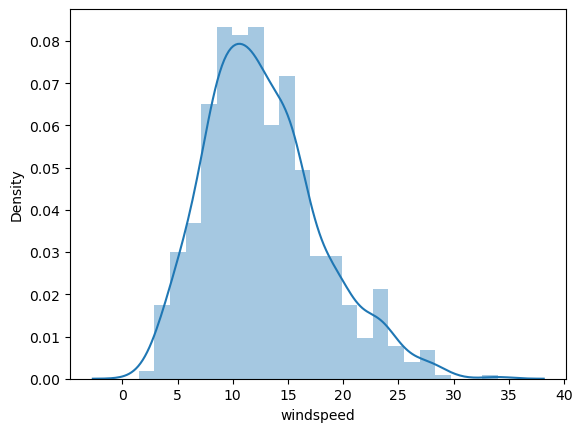

In [301]:
# wind speed
sns.distplot(df['windspeed'])
plt.show()

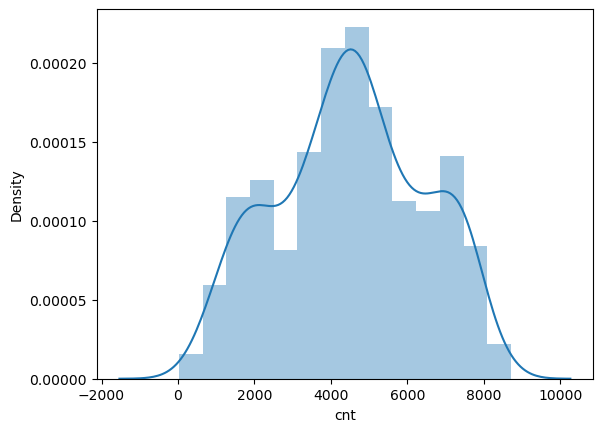

In [302]:
# cnt count of total rental bikes including both casual and registered
sns.distplot(df['cnt'])
plt.show()

In [303]:
# Converting date to datetime format
df['dteday'] = pd.to_datetime(df['dteday'],format= '%d-%m-%Y')
df['dteday']

0     2018-01-01
1     2018-01-02
2     2018-01-03
3     2018-01-04
4     2018-01-05
         ...    
725   2019-12-27
726   2019-12-28
727   2019-12-29
728   2019-12-30
729   2019-12-31
Name: dteday, Length: 730, dtype: datetime64[ns]

In [304]:
# All categorical variables in the dataset
df_cat=df.select_dtypes(exclude=['float64','datetime64','int64'])
print(df_cat.columns)

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')


In [305]:
df_cat

,season,mnth,weekday,weathersit
0,spring,Jan,Sat,Mist
1,spring,Jan,Sun,Mist
2,spring,Jan,Mon,Few
3,spring,Jan,Tues,Few
4,spring,Jan,Wed,Few
...,...,...,...,...
725,spring,Dec,Thurs,Mist
726,spring,Dec,Fri,Mist
727,spring,Dec,Sat,Mist
728,spring,Dec,Sun,Few


#### Visualising Categorical Variables

use boxplot to visualize categorical data.

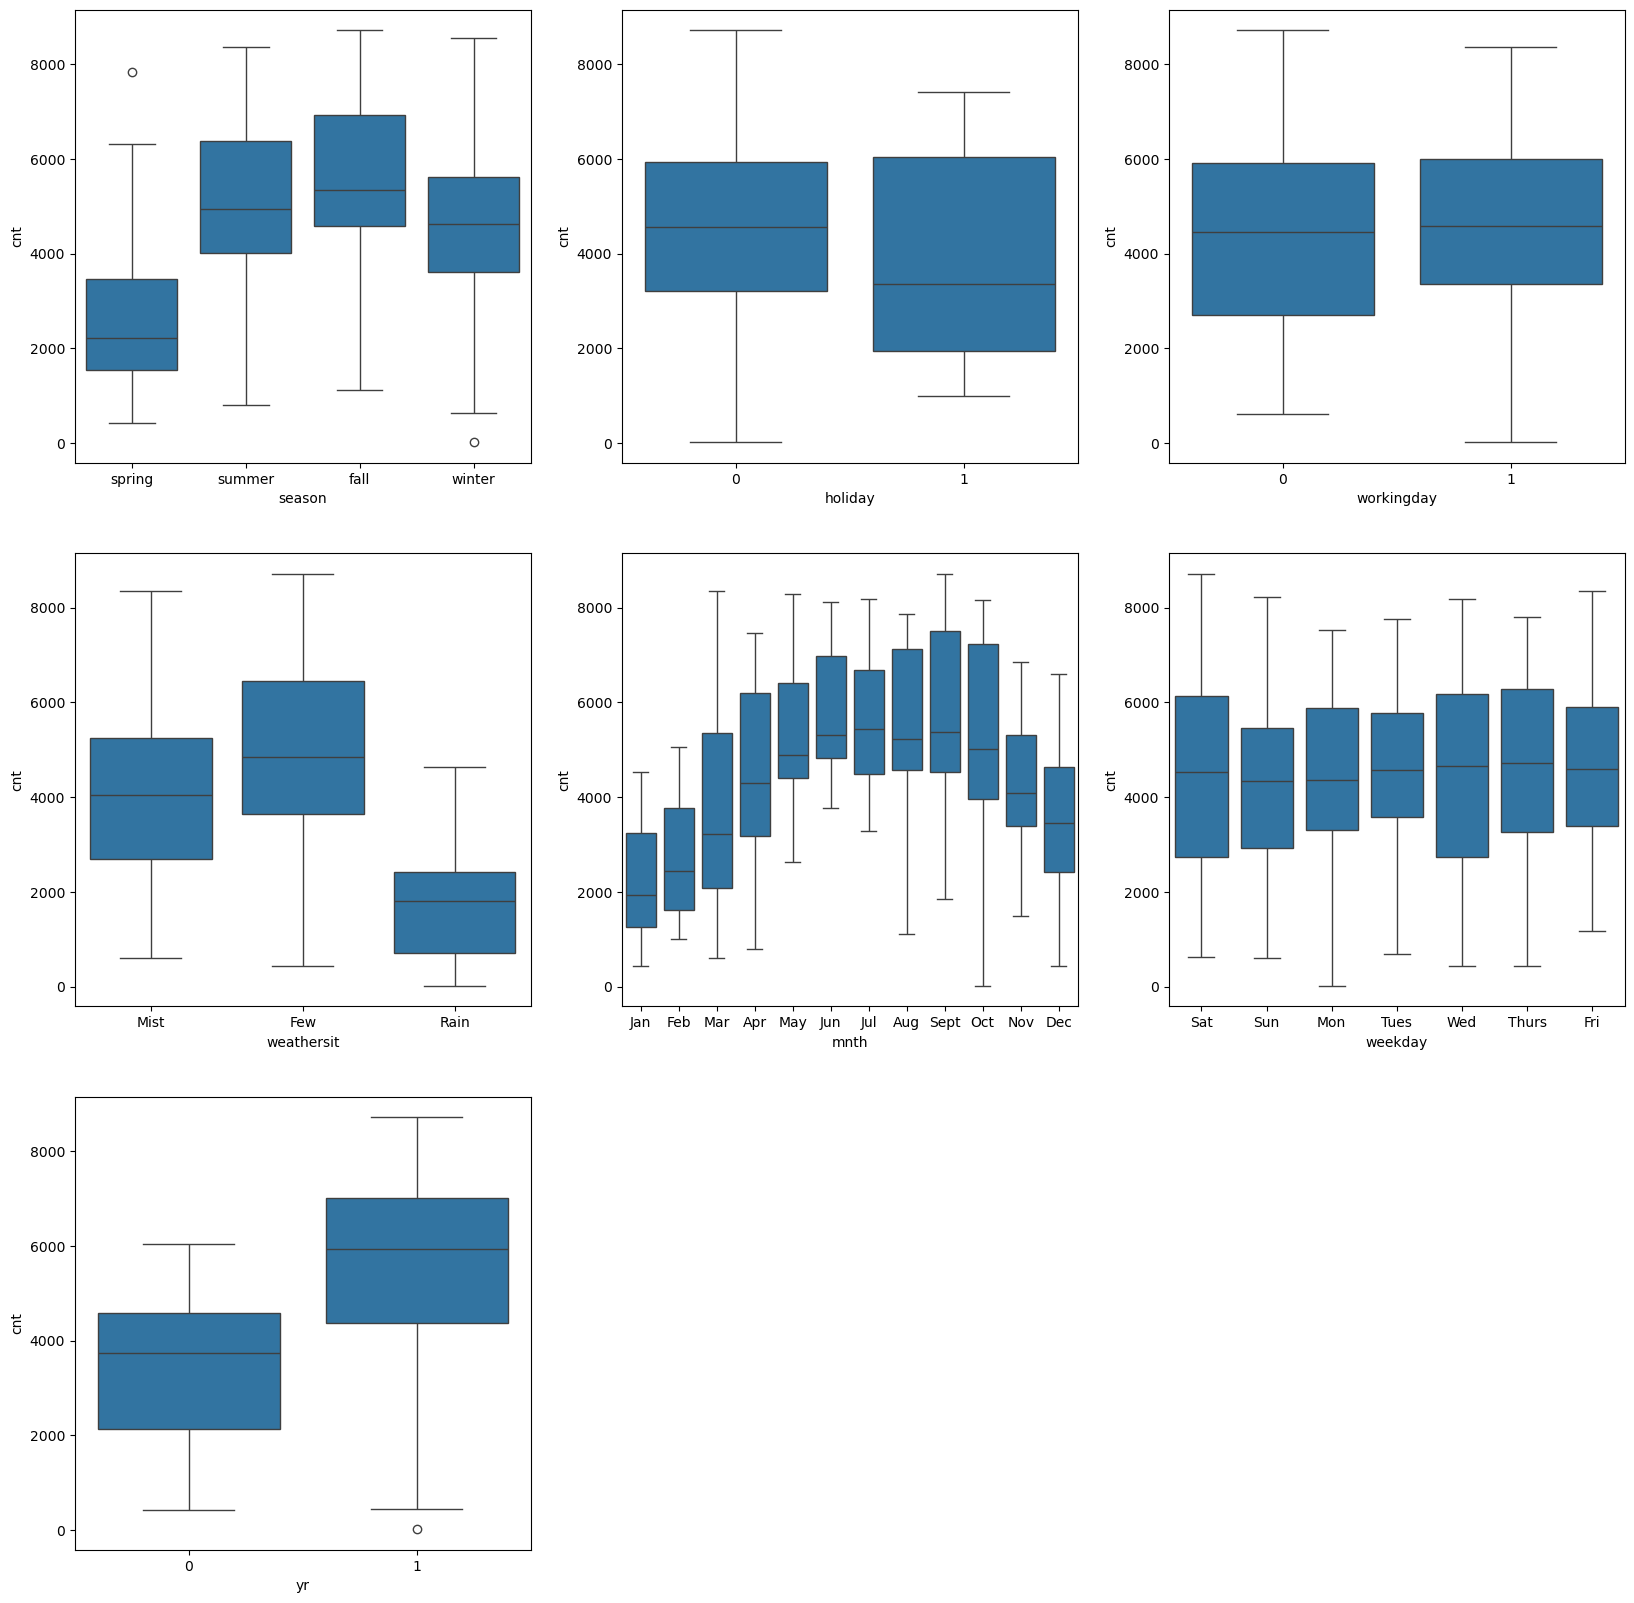

In [306]:
# Bivariate Analysis
plt.figure(figsize=(20, 20))  
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()



#### Visualising Numeric Variables

Use pair plots for numeric variables

In [307]:
# Bivariate Analysis
# Converting "casual","registered" and "cnt" numeric variables to float. 
intList = ["casual","registered","cnt"]

for var in intList:
    df[var] = df[var].astype("float")


In [308]:
# All numeric variables in the dataset
df_num = df.select_dtypes(include=['float64','int64'])
df_num.head()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,2,0,0,0,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,3,0,0,1,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,4,0,0,1,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,5,0,0,1,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


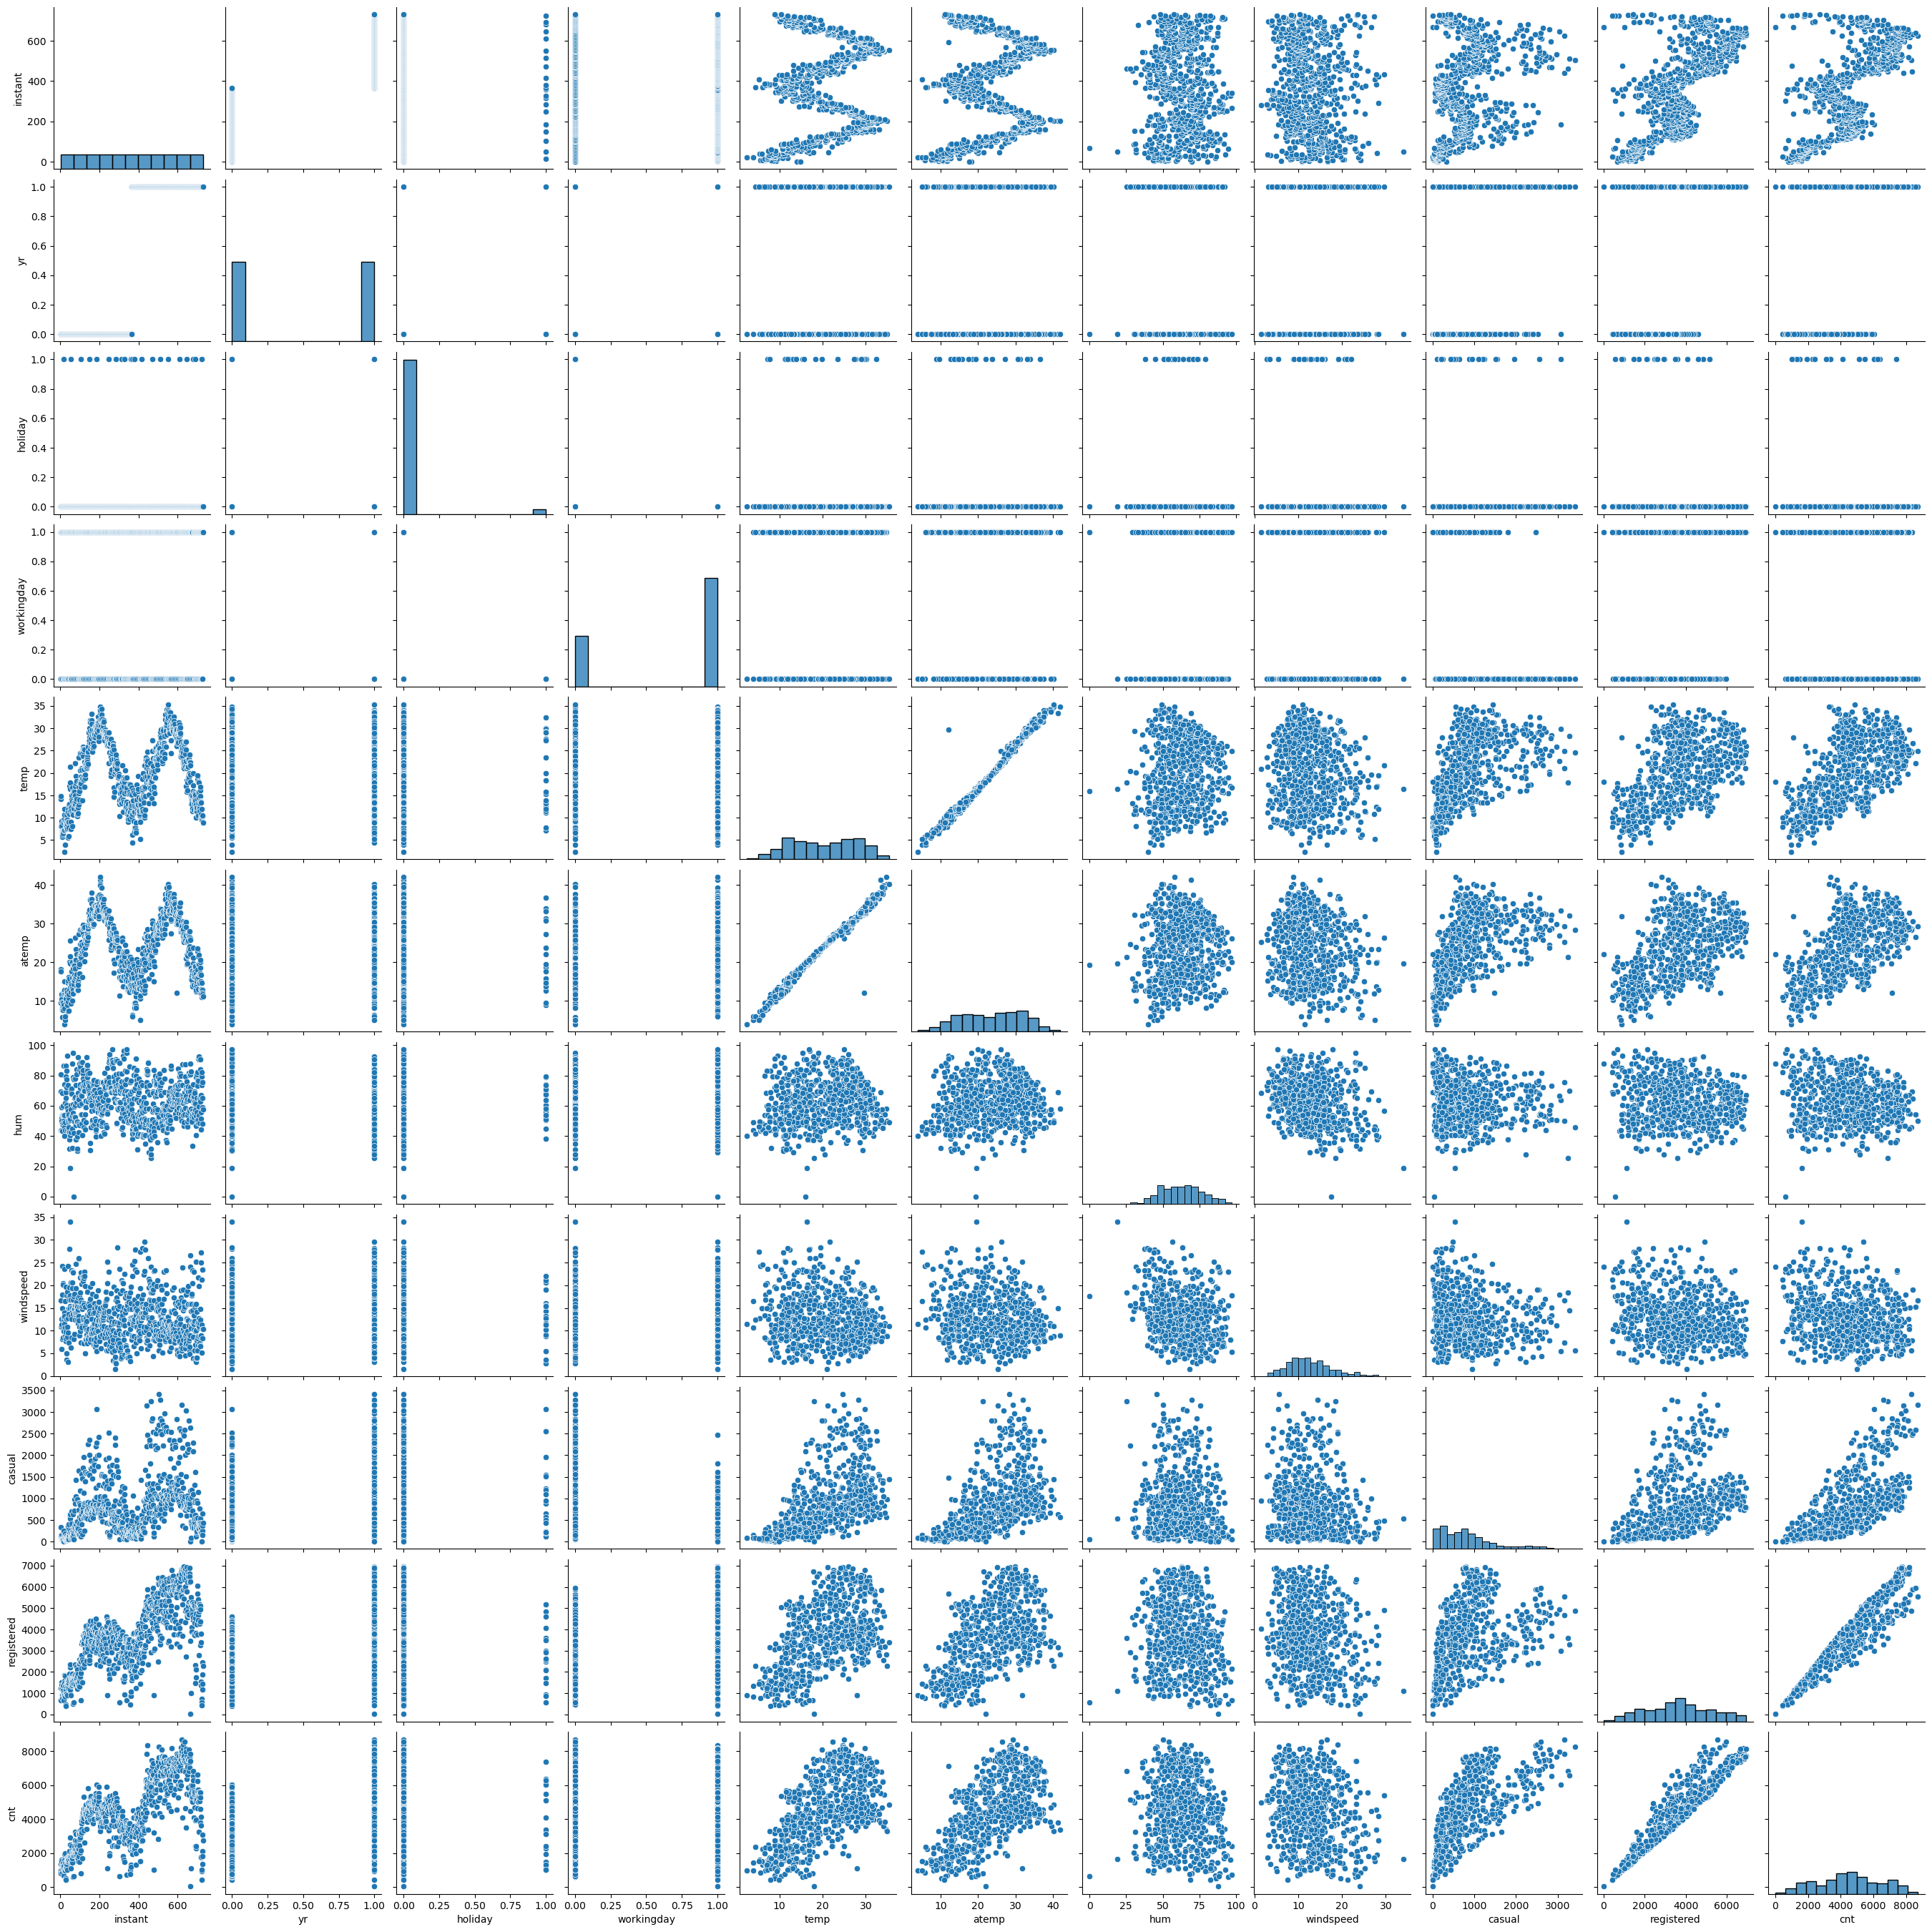

In [309]:
# Pairwise scatter plot
sns.pairplot(df_num)
plt.show()

### Visaulize Correlation matrix using heatmap

In [310]:
# multivariate analysis
# Correlation matrix
cor = df_num.corr()
cor

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.866026,0.016275,-0.004619,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
yr,0.866026,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
holiday,0.016275,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
workingday,-0.004619,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
temp,0.150738,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.016080,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.112667,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.275604,0.250502,0.054055,-0.517607,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.660544,0.596911,-0.109142,0.305437,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411


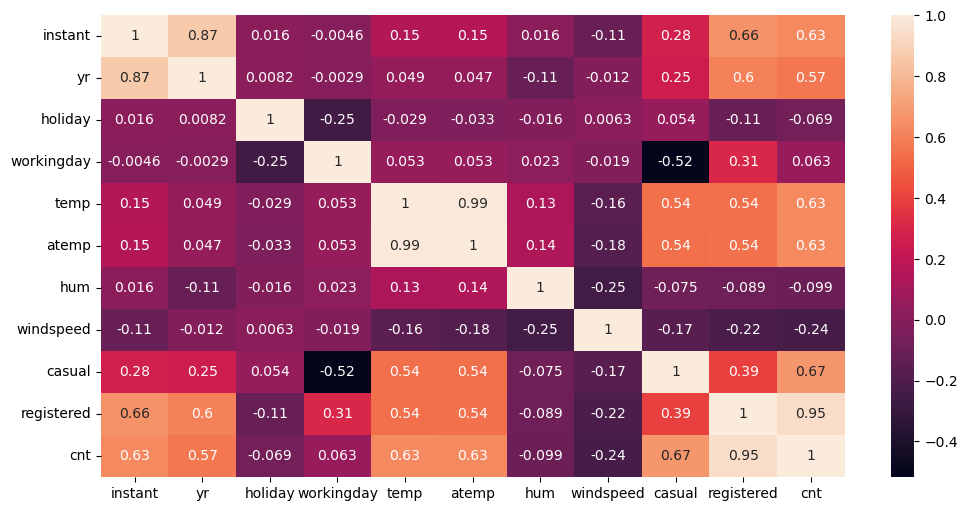

In [311]:
# Multivariate Analysis
plt.figure(figsize=(12,6))
sns.heatmap(df_num.corr(),annot=True)
plt.show()

Some insights from heatmap:

Correlation of'cnt'(count) with independent variables:
- 'cnt' is highly / positively correlated with 'casual' and 'registered' and also it is high with 'atemp'. It clearly shows that the high positive correlation of 'cnt' with 'registered' and 'casual' as both of them together add up to represent 'cnt'.

- 'cnt' is negatively correlated to 'windspeed' (-0.24 approximately). This shows that the shared bikes demand will be less on windy days as compared to normal days.

Correlation among independent variables:
- Some of the independent variables are highly correlated : atemp and temp are highly (positively) correlated. The correlation between the two is almost equal to 1.


Thus, while building the model, we need to pay attention to multicollinearity.

##  Data Preparation 

Prepare the data to build the model.

In [312]:
# Subset all categorical variables
df_cat1 = df.select_dtypes(include=['object'])

In [313]:
df_cat1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   season      730 non-null    object
 1   mnth        730 non-null    object
 2   weekday     730 non-null    object
 3   weathersit  730 non-null    object
dtypes: object(4)
memory usage: 22.9+ KB


#### Dummy Variables
Convert these categorical variables 'season','mnth','weekday' and 'weathersit' to integers by using dummy variables. 


In [314]:
# Convert into dummies
df_dummies = pd.get_dummies(df_cat1, drop_first=True)
df_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Mist,weathersit_Rain
0,True,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,True,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [315]:
df_dummies = df_dummies.astype(int)

In [316]:
df_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Mist,weathersit_Rain
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [317]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   season_spring    730 non-null    int32
 1   season_summer    730 non-null    int32
 2   season_winter    730 non-null    int32
 3   mnth_Aug         730 non-null    int32
 4   mnth_Dec         730 non-null    int32
 5   mnth_Feb         730 non-null    int32
 6   mnth_Jan         730 non-null    int32
 7   mnth_Jul         730 non-null    int32
 8   mnth_Jun         730 non-null    int32
 9   mnth_Mar         730 non-null    int32
 10  mnth_May         730 non-null    int32
 11  mnth_Nov         730 non-null    int32
 12  mnth_Oct         730 non-null    int32
 13  mnth_Sept        730 non-null    int32
 14  weekday_Mon      730 non-null    int32
 15  weekday_Sat      730 non-null    int32
 16  weekday_Sun      730 non-null    int32
 17  weekday_Thurs    730 non-null    int32
 18  weekday_Tu

In [318]:
# Drop categorical variable columns
df = df.drop(list(df_cat1.columns), axis=1)

In [319]:
# Concatenate dummy variables with the original dataframe
df = pd.concat([df, df_dummies], axis=1)

In [320]:
df.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Mist,weathersit_Rain
0,1,2018-01-01,0,0,0,14.110847,18.18125,80.5833,10.749882,331.0,...,0,0,0,1,0,0,0,0,1,0
1,2,2018-01-02,0,0,0,14.902598,17.68695,69.6087,16.652113,131.0,...,0,0,0,0,1,0,0,0,1,0
2,3,2018-01-03,0,0,1,8.050924,9.47025,43.7273,16.636703,120.0,...,0,0,1,0,0,0,0,0,0,0
3,4,2018-01-04,0,0,1,8.200000,10.60610,59.0435,10.739832,108.0,...,0,0,0,0,0,0,1,0,0,0
4,5,2018-01-05,0,0,1,9.305237,11.46350,43.6957,12.522300,82.0,...,0,0,0,0,0,0,0,1,0,0


In [321]:
# Drop the 'instant' and 'dteday' column as they of not any use to us for the analysis
df=df.drop(['instant','dteday'], axis = 1, inplace = False)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Mist,weathersit_Rain
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0,...,0,0,0,0,0,0,0,1,0,0


In [322]:
#removing atemp as it is highly correlated with temp
df.drop('atemp',axis=1,inplace=True) 
df.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Mist,weathersit_Rain
0,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,1,...,0,0,0,0,0,0,0,1,0,0


##  Model Building and Evaluation

In [323]:
# Split the dataframe into train and test sets
df_train, df_test = train_test_split(df, train_size=0.70, test_size=0.30, random_state=50)
print(df_train.shape)
print(df_test.shape)

(510, 31)
(219, 31)


In [324]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Mist,weathersit_Rain
707,1,0,0,15.750847,90.5417,10.584325,441.0,2787.0,3228.0,0,...,0,0,0,0,1,0,0,0,1,0
172,0,0,1,30.066653,70.7500,11.541554,661.0,3846.0,4507.0,0,...,0,0,0,0,0,0,0,1,0,0
14,0,0,0,9.566653,49.8750,10.583521,222.0,1026.0,1248.0,1,...,0,0,0,1,0,0,0,0,1,0
204,0,0,0,34.030000,55.0833,11.334457,1050.0,2556.0,3606.0,0,...,0,0,0,0,1,0,0,0,0,0
182,0,0,0,30.271653,44.4583,7.709154,2204.0,2915.0,5119.0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0,0,0,13.495847,59.4583,14.791925,724.0,1408.0,2132.0,1,...,0,0,0,1,0,0,0,0,0,0
132,0,0,1,21.012500,86.3333,12.041575,692.0,3413.0,4105.0,0,...,0,0,0,0,0,0,0,0,1,0
289,0,0,1,21.900847,57.9583,11.750393,713.0,3857.0,4570.0,0,...,1,0,1,0,0,0,0,0,0,0
109,0,0,1,24.395000,61.4167,16.208975,613.0,3331.0,3944.0,0,...,0,0,0,0,0,0,0,1,0,0


### Scaling

After the data set split in to train and test, we need to scale the training numeric variables for better interpretability, by using MinMaxScaler.

In [325]:
scaler = MinMaxScaler()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 707 to 480
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               510 non-null    int64  
 1   holiday          510 non-null    int64  
 2   workingday       510 non-null    int64  
 3   temp             510 non-null    float64
 4   hum              510 non-null    float64
 5   windspeed        510 non-null    float64
 6   casual           510 non-null    float64
 7   registered       510 non-null    float64
 8   cnt              510 non-null    float64
 9   season_spring    510 non-null    int32  
 10  season_summer    510 non-null    int32  
 11  season_winter    510 non-null    int32  
 12  mnth_Aug         510 non-null    int32  
 13  mnth_Dec         510 non-null    int32  
 14  mnth_Feb         510 non-null    int32  
 15  mnth_Jan         510 non-null    int32  
 16  mnth_Jul         510 non-null    int32  
 17  mnth_Jun         51

In [326]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['temp', 'hum', 'windspeed','casual','registered','cnt']

df_train[var] = scaler.fit_transform(df_train[var])

In [327]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Mist,weathersit_Rain
707,1,0,0,0.417140,0.933018,0.243629,0.133801,0.401538,0.368845,0,...,0,0,0,0,1,0,0,0,1,0
172,0,0,1,0.865247,0.729068,0.274549,0.200853,0.555217,0.515992,0,...,0,0,0,0,0,0,0,1,0,0
14,0,0,0,0.223565,0.513954,0.243603,0.067053,0.145988,0.141049,1,...,0,0,0,1,0,0,0,0,1,0
204,0,0,0,0.989306,0.567625,0.267859,0.319415,0.368016,0.412333,0,...,0,0,0,0,1,0,0,0,0,0
182,0,0,0,0.871664,0.458136,0.150755,0.671137,0.420113,0.586401,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0,0,0,0.346555,0.612709,0.379542,0.220055,0.201422,0.242752,1,...,0,0,0,1,0,0,0,0,0,0
132,0,0,1,0.581838,0.889652,0.290701,0.210302,0.492381,0.469742,0,...,0,0,0,0,0,0,0,0,1,0
289,0,0,1,0.609645,0.597251,0.281295,0.216702,0.556813,0.523240,0,...,1,0,1,0,0,0,0,0,0,0
109,0,0,1,0.687715,0.632890,0.425316,0.186224,0.480482,0.451220,0,...,0,0,0,0,0,0,0,1,0,0


In [328]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Mist,weathersit_Rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.482353,0.023529,0.705882,0.552680,0.644848,0.318203,0.249493,0.524432,0.509945,0.245098,...,0.086275,0.064706,0.152941,0.135294,0.135294,0.145098,0.149020,0.139216,0.341176,0.031373
std,0.500179,0.151726,0.456092,0.230600,0.149640,0.167086,0.205065,0.227388,0.223408,0.430568,...,0.281045,0.246248,0.360284,0.342373,0.342373,0.352545,0.356457,0.346511,0.474570,0.174494
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343347,0.524581,0.197916,0.094179,0.355282,0.350523,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.553497,0.648347,0.295422,0.210149,0.528878,0.516222,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.757231,0.752576,0.406471,0.319186,0.686257,0.672141,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


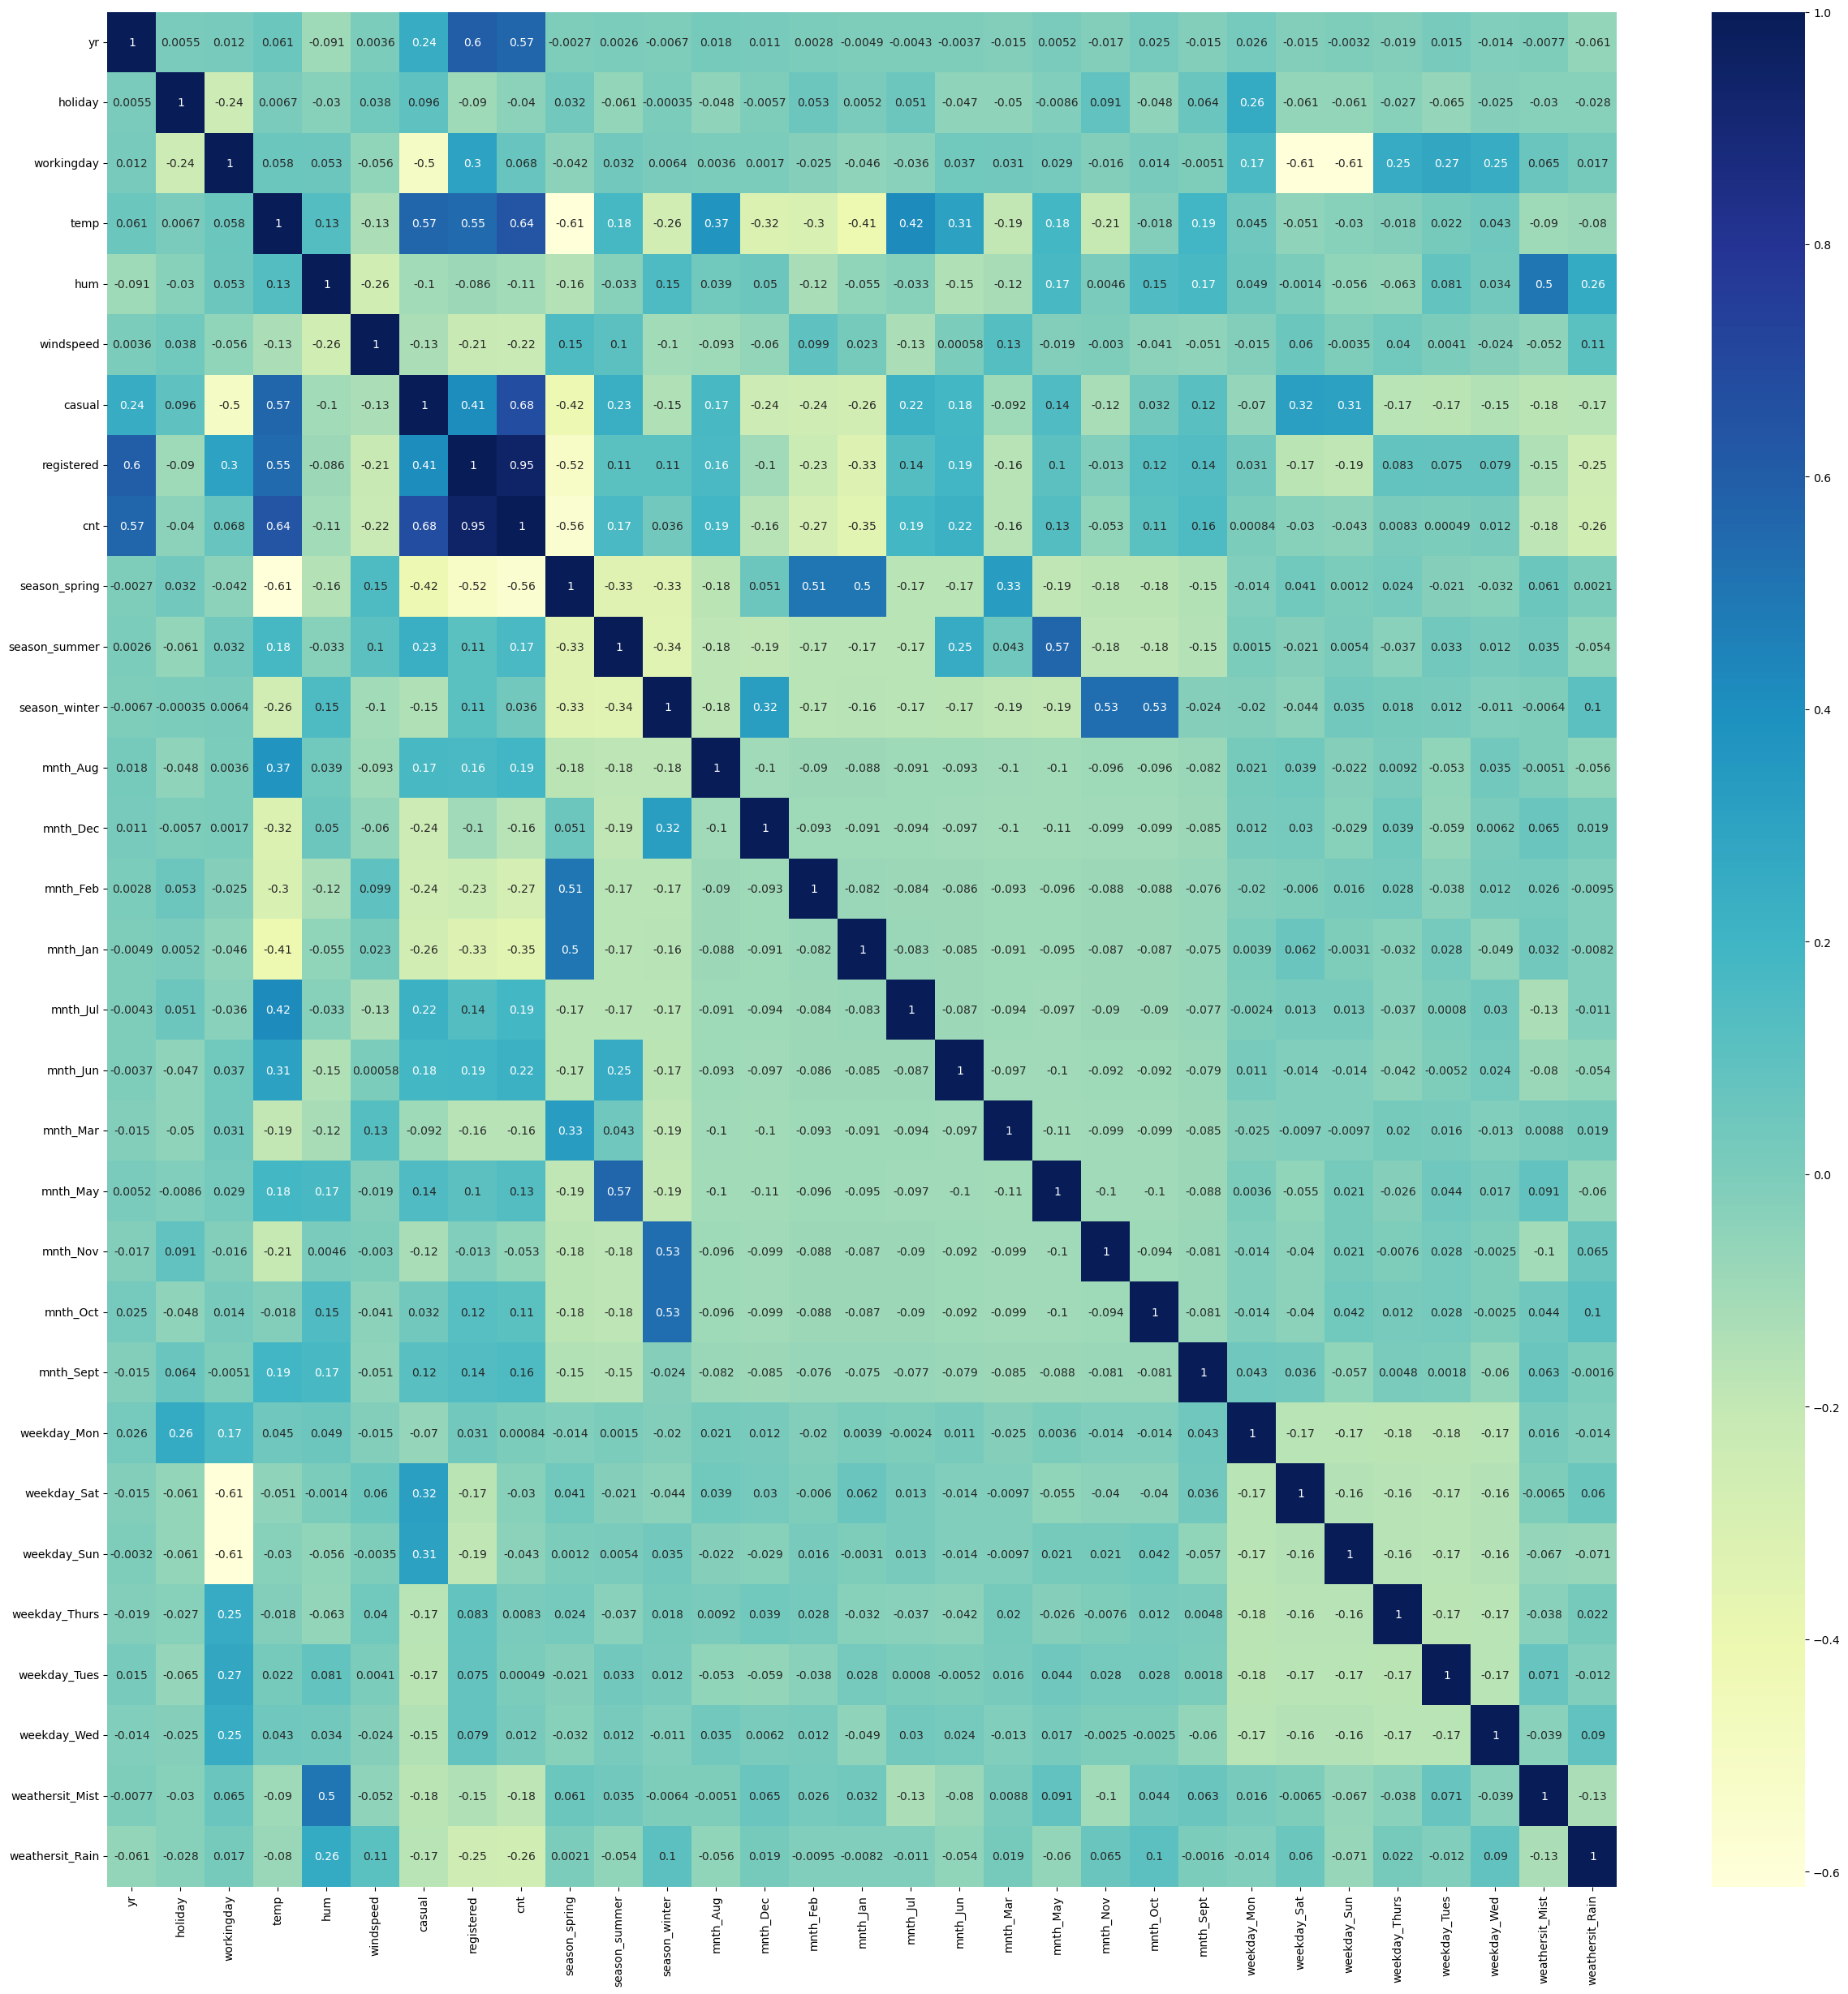

In [329]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

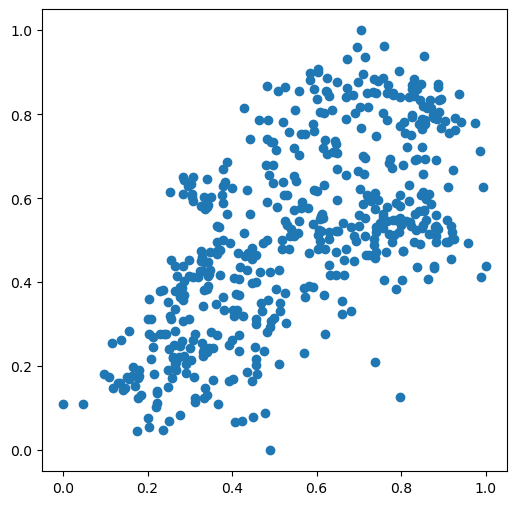

In [330]:
# As you might have noticed, temp seems to the correlated to cnt the most, after 'casual' and 'registered'
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

#### Dividing into X and Y sets for the model building

In [331]:
# Dropping 'casual' and 'registered' as together they add up to cnt
y_train = df_train.pop('cnt')
X_train = df_train.drop(["casual","registered"],axis=1) 

In [332]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Mist,weathersit_Rain
707,1,0,0,0.417140,0.933018,0.243629,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
172,0,0,1,0.865247,0.729068,0.274549,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14,0,0,0,0.223565,0.513954,0.243603,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
204,0,0,0,0.989306,0.567625,0.267859,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
182,0,0,0,0.871664,0.458136,0.150755,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [333]:
X_train.shape

(510, 28)

### Building the first model with all the features

Let's now build our first model with all the features.

In [334]:
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

#print(lr.params)

# getting the model summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     106.8
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          2.70e-184
Time:                        10:27:56   Log-Likelihood:                 536.82
No. Observations:                 510   AIC:                            -1018.
Df Residuals:                     482   BIC:                            -899.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2807      0.036      7.894      0.000       0.211       0.351
yr                  0.2327      0.008     29.469      0.000       0.217       0.248
holiday             0.0446      0.024      1.835      0.067      -0.003       0.092
workingday          0.0924      0.012      7.617      0.000       0.069       0.116
temp                0.4492      0.046      9.844      0.000       0.360       0.539
hum                -0.2011      0.038     -5.236      0.000      -0.277      -0.126
windspeed          -0.1913      0.026     -7.470      0.000      -0.242      -0.141
season_spring      -0.0650      0.030     -2.176      0.030      -0.124      -0.006
season_summer       0.0236      0.025      0.947      0.344      -0.025       0.073
season_winter       0.1216      0.029      4.141      0.000       0.064       0.179
mnth_Aug           -0.0053      0.033     -0.163      0.871      -0.070       0.059
mnth_Dec           -0.0714      0.034     -2.090      0.037      -0.139      -0.004
mnth_Feb           -0.0343      0.033     -1.042      0.298      -0.099       0.030
mnth_Jan           -0.0596      0.035     -1.723      0.086      -0.128       0.008
mnth_Jul           -0.0268      0.034     -0.792      0.429      -0.093       0.040
mnth_Jun            0.0185      0.024      0.767      0.443      -0.029       0.066
mnth_Mar           -0.0011      0.026     -0.041      0.967      -0.052       0.050
mnth_May            0.0273      0.020      1.368      0.172      -0.012       0.066
mnth_Nov           -0.0752      0.037     -2.040      0.042      -0.148      -0.003
mnth_Oct           -0.0144      0.036     -0.402      0.688      -0.084       0.056
mnth_Sept           0.0597      0.032      1.891      0.059      -0.002       0.122
weekday_Mon        -0.0258      0.015     -1.777      0.076      -0.054       0.003
weekday_Sat         0.0993      0.014      7.039      0.000       0.072       0.127
weekday_Sun         0.0445      0.014      3.238      0.001       0.017       0.071
weekday_Thurs      -0.0001      0.014     -0.009      0.993      -0.029       0.028
weekday_Tues       -0.0213      0.014     -1.476      0.141      -0.050       0.007
weekday_Wed        -0.0083      0.015     -0.563      0.574      -0.037       0.021
weathersit_Mist    -0.0469      0.011     -4.431      0.000      -0.068      -0.026
weathersit_Rain    -0.2124      0.026     -8.292      0.000      -0.263      -0.162
==============================================================================
Omnibus:                       92.144   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.842
Skew:                          -0.846   Prob(JB):                     1.71e-61
Kurtosis:                       6.210   Cond. No.                     1.03e+16


This model has an Adjusted R-squared value of **84.9%** which seems pretty good. But let's see if we can exclude some features, which are not much relevant in explaining the target variable. 

#### Model Building Using RFE

Manually eliminating the features is not recommended. Better to use RFE to eliminate the features. Lets start off with random number lets say with 15 features, and then use the `statsmodels` library to build models using the shortlisted features (this is also because `SKLearn` doesn't have `Adjusted R-squared` that `statsmodels` has).

In [335]:
# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm, n_features_to_select=15)

# Fit with 15 features
rfe1.fit(X_train, y_train)

list(zip(X_train.columns,rfe1.support_,rfe1.ranking_)) 

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 12),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 3),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', False, 2),
 ('mnth_Jun', False, 6),
 ('mnth_Mar', False, 13),
 ('mnth_May', False, 5),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 10),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', False, 4),
 ('weekday_Sat', False, 7),
 ('weekday_Sun', True, 1),
 ('weekday_Thurs', False, 14),
 ('weekday_Tues', False, 9),
 ('weekday_Wed', False, 11),
 ('weathersit_Mist', True, 1),
 ('weathersit_Rain', True, 1)]

In [336]:
# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Dec,mnth_Jan,mnth_Nov,mnth_Sept,weekday_Sun,weathersit_Mist,weathersit_Rain
707,1.0,1,0,0.417140,0.933018,0.243629,0,0,1,1,0,0,0,1,1,0
172,1.0,0,0,0.865247,0.729068,0.274549,0,0,0,0,0,0,0,0,0,0
14,1.0,0,0,0.223565,0.513954,0.243603,1,0,0,0,1,0,0,0,1,0
204,1.0,0,0,0.989306,0.567625,0.267859,0,0,0,0,0,0,0,1,0,0
182,1.0,0,0,0.871664,0.458136,0.150755,0,0,0,0,0,0,0,0,0,0


In [337]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     189.9
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          6.02e-194
Time:                        10:28:16   Log-Likelihood:                 528.75
No. Observations:                 510   AIC:                            -1026.
Df Residuals:                     494   BIC:                            -957.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3373      0.035     

Based on the new model and the selected features there is not huge dip in the Adjusted R-square from the model that has all features included. It has gone from **84.9%** to **84.8%**. Which is actually a good sign.

But let's check for the multicollinearity among these variables.

In [338]:
# Check for the VIF values of the feature variables.
a=X_train_rfe1.drop('const',axis=1)

vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.69
2,temp,17.15
4,windspeed,4.80
5,season_spring,4.20
7,season_winter,3.96
6,season_summer,2.47
13,weathersit_Mist,2.45
0,yr,1.98
10,mnth_Nov,1.88
8,mnth_Dec,1.61


In [339]:
# Let's drop the 'hum' column
X_train_rfe1.drop("hum",axis=1,inplace=True)
X_train_rfe1

,const,yr,holiday,temp,windspeed,season_spring,season_summer,season_winter,mnth_Dec,mnth_Jan,mnth_Nov,mnth_Sept,weekday_Sun,weathersit_Mist,weathersit_Rain
707,1.0,1,0,0.417140,0.243629,0,0,1,1,0,0,0,1,1,0
172,1.0,0,0,0.865247,0.274549,0,0,0,0,0,0,0,0,0,0
14,1.0,0,0,0.223565,0.243603,1,0,0,0,1,0,0,0,1,0
204,1.0,0,0,0.989306,0.267859,0,0,0,0,0,0,0,1,0,0
182,1.0,0,0,0.871664,0.150755,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,1.0,0,0,0.346555,0.379542,1,0,0,0,0,0,0,0,0,0
132,1.0,0,0,0.581838,0.290701,0,1,0,0,0,0,0,0,1,0
289,1.0,0,0,0.609645,0.281295,0,0,1,0,0,0,0,0,0,0
109,1.0,0,0,0.687715,0.425316,0,1,0,0,0,0,0,0,0,0


In [340]:
X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Now that we have removed one variable, let's fit the model with 14 variables
lm3 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.4
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          1.94e-188
Time:                        10:28:36   Log-Likelihood:                 512.86
No. Observations:                 510   AIC:                            -995.7
Df Residuals:                     495   BIC:                            -932.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2476      0.032     

Based on the new model and the selected features there is not huge dip in the Adjusted R-square from the model that has all features included. It has gone from **84.8%** to **83.8%**. Which is actually a good sign.

But let's check for the multicollinearity among these variables.

In [341]:
# Check for the VIF values of the feature variables.
a=X_train_rfe1.drop('const',axis=1)

vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.68
2,temp,4.00
6,season_winter,2.84
4,season_spring,2.61
0,yr,1.96
5,season_summer,1.96
9,mnth_Nov,1.81
12,weathersit_Mist,1.59
7,mnth_Dec,1.51
8,mnth_Jan,1.48


Holiday column seems to have high p-value >0.05

In [342]:
# Let's drop the 'holiday' column
X_train_rfe1.drop("holiday",axis=1,inplace=True)
X_train_rfe1

,const,yr,temp,windspeed,season_spring,season_summer,season_winter,mnth_Dec,mnth_Jan,mnth_Nov,mnth_Sept,weekday_Sun,weathersit_Mist,weathersit_Rain
707,1.0,1,0.417140,0.243629,0,0,1,1,0,0,0,1,1,0
172,1.0,0,0.865247,0.274549,0,0,0,0,0,0,0,0,0,0
14,1.0,0,0.223565,0.243603,1,0,0,0,1,0,0,0,1,0
204,1.0,0,0.989306,0.267859,0,0,0,0,0,0,0,1,0,0
182,1.0,0,0.871664,0.150755,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,1.0,0,0.346555,0.379542,1,0,0,0,0,0,0,0,0,0
132,1.0,0,0.581838,0.290701,0,1,0,0,0,0,0,0,1,0
289,1.0,0,0.609645,0.281295,0,0,1,0,0,0,0,0,0,0
109,1.0,0,0.687715,0.425316,0,1,0,0,0,0,0,0,0,0


In [343]:
X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Now that we have removed one variable, let's fit the model with 13 variables
lm3 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.6
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          2.29e-188
Time:                        10:29:08   Log-Likelihood:                 509.92
No. Observations:                 510   AIC:                            -991.8
Df Residuals:                     496   BIC:                            -932.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2506      0.033     

Based on the new model and the selected features there is not huge dip in the Adjusted R-square from the model that has all features included. It has gone from **83.8%** to **83.7%**. Which is actually a good sign.

But let's check for the multicollinearity among these variables.

In [344]:
# Check for the VIF values of the feature variables.
a=X_train_rfe1.drop('const',axis=1)

vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.68
1,temp,3.99
5,season_winter,2.83
3,season_spring,2.60
0,yr,1.96
4,season_summer,1.96
8,mnth_Nov,1.78
11,weathersit_Mist,1.59
6,mnth_Dec,1.51
7,mnth_Jan,1.48


All the VIF values and p-values seem to be in the permissible range now. Also the `Adjusted R-squared` value has dropped from **84.9%** with **28 variables** to just **83.7%** using **13 variables**. This model is explaining most of the variance without being too complex. So let's proceed with this model.

### Residual Analysis

Before we make predictions on the test set, let's first analyse the residuals.

In [345]:
y_train_cnt = lm3.predict(X_train_rfe1)

Text(0.5, 0, 'Errors')

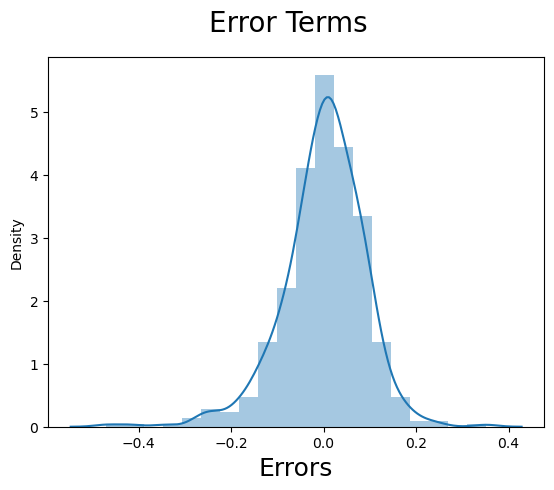

In [346]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)                         

Errors are normally distribured here with mean 0. So everything seems to be fine


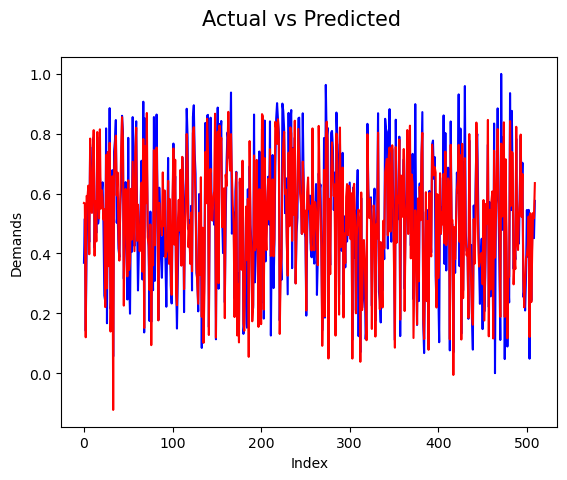

In [347]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Actual and Predicted result following almost the same pattern so this model seems ok

### Linearity Check

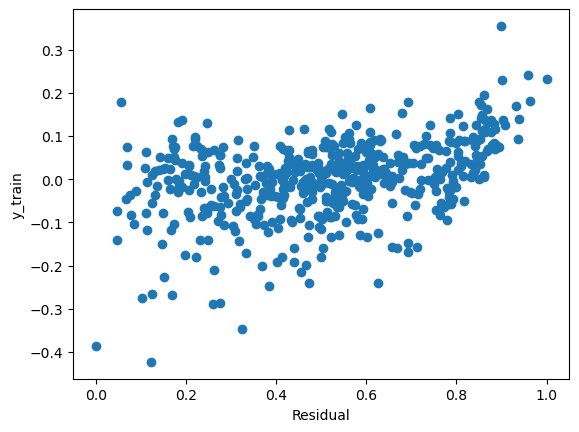

In [348]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

### Making Predictions

We would first need to scale the test set as well. So let's start with that.

In [349]:
X_train_rfe1

,const,yr,temp,windspeed,season_spring,season_summer,season_winter,mnth_Dec,mnth_Jan,mnth_Nov,mnth_Sept,weekday_Sun,weathersit_Mist,weathersit_Rain
707,1.0,1,0.417140,0.243629,0,0,1,1,0,0,0,1,1,0
172,1.0,0,0.865247,0.274549,0,0,0,0,0,0,0,0,0,0
14,1.0,0,0.223565,0.243603,1,0,0,0,1,0,0,0,1,0
204,1.0,0,0.989306,0.267859,0,0,0,0,0,0,0,1,0,0
182,1.0,0,0.871664,0.150755,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,1.0,0,0.346555,0.379542,1,0,0,0,0,0,0,0,0,0
132,1.0,0,0.581838,0.290701,0,1,0,0,0,0,0,0,1,0
289,1.0,0,0.609645,0.281295,0,0,1,0,0,0,0,0,0,0
109,1.0,0,0.687715,0.425316,0,1,0,0,0,0,0,0,0,0


In [350]:
# let's recall the set of variables which are to be scaled
var

['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [351]:
df_test[var] = scaler.transform(df_test[var])

In [352]:
# Split the 'df_test' set into X and y after scaling
y_test = df_test.pop('cnt')
X_test = df_test.drop(["casual","registered"],axis=1)

In [353]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Mist,weathersit_Rain
333,0,0,1,0.341207,0.632030,0.488582,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
203,0,0,0,1.013904,0.515242,0.185727,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
279,0,0,1,0.579699,0.705024,-0.049804,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
483,1,0,0,0.512322,0.604980,0.154750,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
267,0,0,0,0.737981,0.870760,0.010767,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0


In [354]:
# Let's check the list 'col2' which had the 6 variables RFE had selected
col2=a.columns
col2

Index(['yr', 'temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Nov', 'mnth_Sept',
       'weekday_Sun', 'weathersit_Mist', 'weathersit_Rain'],
      dtype='object')

In [355]:
# Let's subset these columns and create a new dataframe 
X_test_rfe2 = X_test[col2]

In [356]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 333 to 43
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   const            219 non-null    float64
 1   yr               219 non-null    int64  
 2   temp             219 non-null    float64
 3   windspeed        219 non-null    float64
 4   season_spring    219 non-null    int32  
 5   season_summer    219 non-null    int32  
 6   season_winter    219 non-null    int32  
 7   mnth_Dec         219 non-null    int32  
 8   mnth_Jan         219 non-null    int32  
 9   mnth_Nov         219 non-null    int32  
 10  mnth_Sept        219 non-null    int32  
 11  weekday_Sun      219 non-null    int32  
 12  weathersit_Mist  219 non-null    int32  
 13  weathersit_Rain  219 non-null    int32  
dtypes: float64(3), int32(10), int64(1)
memory usage: 17.1 KB


In [357]:
# Making predictions
y_pred = lm3.predict(X_test_rfe2)
y_train_pred=lm3.predict(X_train_rfe1)


Text(0, 0.5, 'y_pred')

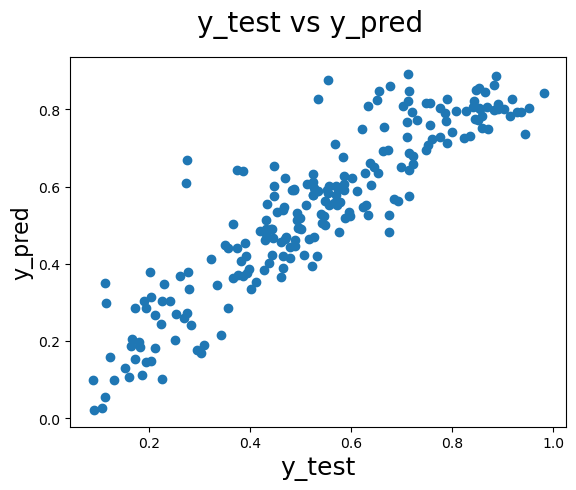

In [358]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

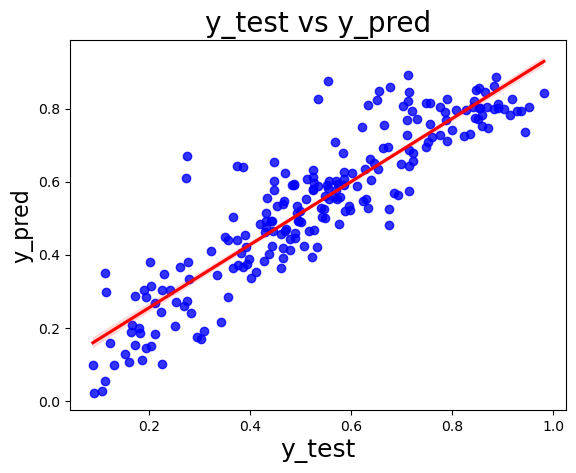

In [359]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [360]:
r2_score(y_test, y_pred)

0.8083522724351946

Thus, for the model with 13 variables, the r-squared on training and test data is about 84.1% and 80.8% respectively. The adjusted r-squared on the train set is about is about 83.7%.

In [361]:
round(lm3.params,4)

const              0.2506
yr                 0.2364
temp               0.4141
windspeed         -0.1515
season_spring     -0.0791
season_summer      0.0424
season_winter      0.1042
mnth_Dec          -0.0596
mnth_Jan          -0.0487
mnth_Nov          -0.0682
mnth_Sept          0.0545
weekday_Sun       -0.0392
weathersit_Mist   -0.0805
weathersit_Rain   -0.2723
dtype: float64

We can see that the equation of our best fitted line is:

$ cnt = 0.2506 + 0.2364  \times  year + 0.4141  \times  temp - 0.1515 \times windspeed - 0.0791 \times season spring + 0.0424 \times season summer + 0.1042 \times season winter - 0.0596 \times mnth Dec - 0.0487 \times mnth Jan - 0.0682 \times mnth Nov + 0.0545 \times mnth Sept - 0.0392 \times weekday Sun - 0.0805 \times weathersit Mist - 0.2723 \times weathersit Rain $

#### Checking the correlations between the final predictor variables

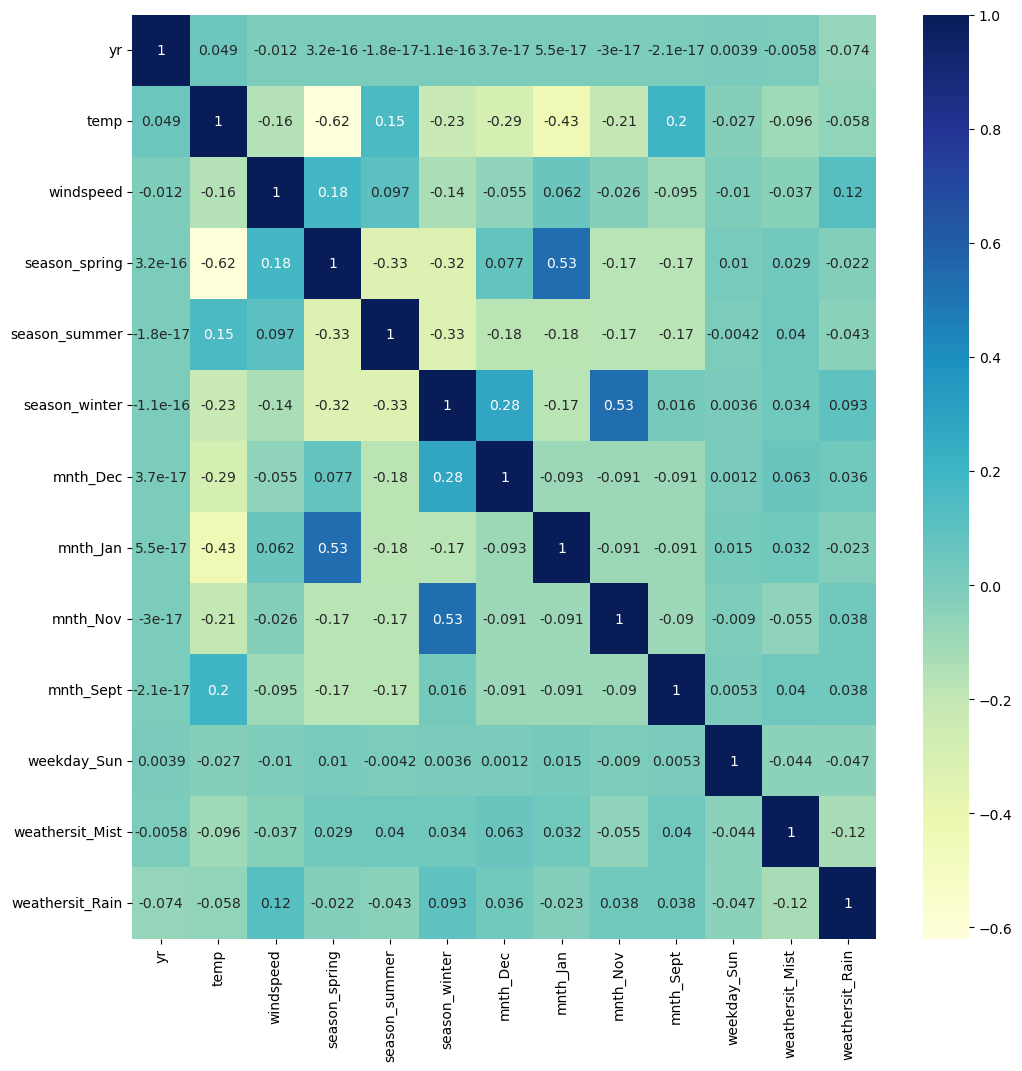

In [362]:
# Figure size
plt.figure(figsize=(12,12))

# Heatmap
sns.heatmap(df[col2].corr(), cmap="YlGnBu", annot=True)
plt.show()

## The comapany should focus on the following features:
- Company should focus on expanding business during Summer and Winter.
- Company should focus on expanding business Specially on September month.
- There would be less bookings during Light Spring / Snow or Rain and during November, December and Junauary month, they could probably use this time to service and maintain the bikes without having business impact.

#### Significant variables to predict the demand for shared bikes
- yr
- temp
- windspeed
- season_spring
- season_summer
- season_winter
- mnth_Dec
- mnth_Jan
- mnth_Nov
- mnth_Sept
- weekday_Sun
- weathersit_Mist
- weathersit_Rain
